In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [54]:
import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings('ignore')



In [3]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploretary analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop("customerID",axis="columns",inplace=True)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6874,Female,0,Yes,No,31,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.20,1498.55,No
2941,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),97.95,7114.25,No
1295,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.60,5460.2,No
2681,Male,0,Yes,No,46,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,No,Credit card (automatic),40.40,1842.7,No
3760,Male,0,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),73.60,232.5,No


In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [15]:
#pd.to_numeric(df.TotalCharges)

In [16]:
pd.to_numeric(df.TotalCharges,errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [19]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull().sum()

11

In [20]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [22]:
df.iloc[488]["TotalCharges"]

' '

In [23]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [26]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [32]:
df1.TotalCharges.dtypes

dtype('float64')

In [35]:
tenure_churn_no=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure

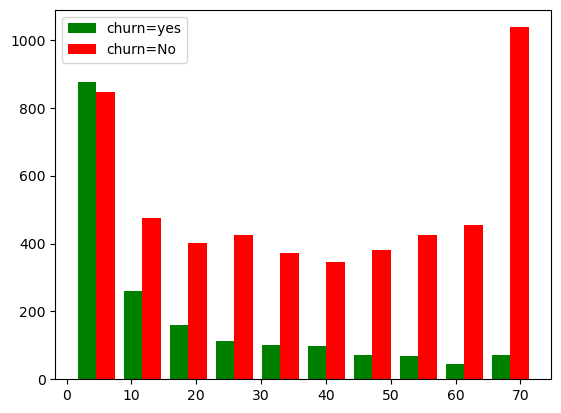

In [38]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","red"],label=["churn=yes","churn=No"])
plt.legend()

In [41]:
mc_churn_no=df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges


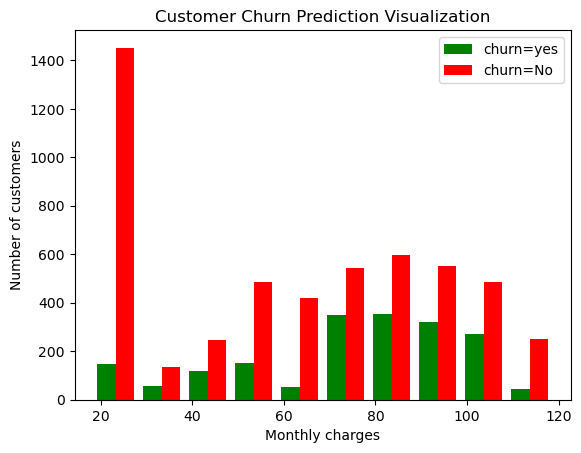

In [42]:
plt.xlabel("Monthly charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes,mc_churn_no],color=["green","red"],label=["churn=yes","churn=No"])
plt.legend()

In [43]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Label Encoding 

In [48]:
def print_unique_col_values(df1):
    for column in df1:
        if df1[column].dtype=="object": 
            print(f'{column} : {df1[column].unique()}')

In [49]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [55]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)


In [56]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [57]:
yes_no_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","PaperlessBilling",
                "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Churn"]

In [58]:
for col in yes_no_columns:
    df1[col].replace({"Yes" : 1,"No": 0},inplace=True)

In [60]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [64]:
df1["gender"].replace({"Female" : 1, "Male": 0},inplace=True)
df1["gender"].unique()

array([1, 0], dtype=int64)

In [70]:
df2=pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [71]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6177,0,0,0,0,4,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
3565,0,0,0,0,1,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
3085,0,0,0,0,3,1,1,0,1,1,...,False,True,False,True,False,False,True,False,False,False


In [72]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

## Scaling

In [73]:
col_to_scale=["tenure","MonthlyCharges","TotalCharges"]

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])

In [75]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


## Train_test_split

In [76]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [82]:
len(x_train),len(x_test)

(5625, 1407)

In [83]:
len(y_train),len(y_test)

(5625, 1407)

In [85]:
x_train.shape

(5625, 26)

## model creation

In [95]:
import tensorflow as tf
from tensorflow import keras

In [91]:
# Assuming x_train is your input data
x_train = x_train.astype(np.float32)  # Convert to float32
y_train = y_train.astype(np.float32)  # Convert to float32

In [98]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]

)

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.5461 - accuracy: 0.7106
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.7911
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4204 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8007
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4144 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4129 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4121 - accuracy: 0.8094
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4112 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4090 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4089 - accura

176/176 [==============================] - 1s 5ms/step - loss: 0.3741 - accuracy: 0.8238
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3742 - accuracy: 0.8217
Epoch 83/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3732 - accuracy: 0.8222
Epoch 84/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3734 - accuracy: 0.8249
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3732 - accuracy: 0.8251
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3727 - accuracy: 0.8279
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3724 - accuracy: 0.8267
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3718 - accuracy: 0.8258
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3715 - accuracy: 0.8277
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3716 - accuracy: 

In [100]:
# Assuming x_train is your input data
x_test = x_test.astype(np.float32)  # Convert to float32
y_test = y_test.astype(np.float32)  # Convert to float32

In [101]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 6ms/step - loss: 0.4675 - accuracy: 0.7882


[0.46752846240997314, 0.7882018685340881]

In [102]:
y_predicted=model.predict(x_test)
y_predicted[:5]

44/44 [==============================] - 1s 4ms/step


array([[0.30201006],
       [0.32463714],
       [0.01139385],
       [0.902023  ],
       [0.3725822 ]], dtype=float32)

In [103]:
y_test[:5]

2660    0.0
744     0.0
5579    1.0
64      1.0
3287    1.0
Name: Churn, dtype: float32

In [105]:
y_pred=[]
for i in y_predicted:
        if i>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

In [108]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [109]:
y_test[:10]

2660    0.0
744     0.0
5579    1.0
64      1.0
3287    1.0
816     1.0
2670    0.0
5920    0.0
1023    0.0
6087    0.0
Name: Churn, dtype: float32

In [110]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       999
         1.0       0.65      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



In [111]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

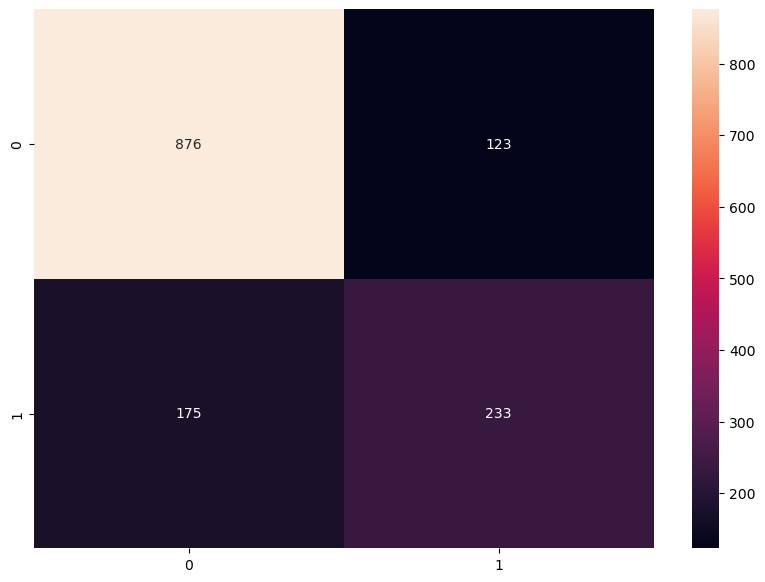

In [112]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel=("Predicted")
plt.ylabel=("Truth")
